# 1.数据收集
首先，收集一定数量的男女照片作为训练数据。此处收集了CelebA数据集，使用如下链接https://pan.baidu.com/s/1eSNpdRG 提取码：g5qa
从百度网盘下载的CelebA数据集是一个名为img_align_celeba.zip的压缩文件。
解压完成后，有一个名为img_align_celeba的文件夹，里面包含了CelebA数据集的所有图片（20万张）。同时，找到list_attr_celeba.txt文件，，使用list_attr_celeba.txt文件和classification_of_men_and_women.py将图片分为男女两个文件夹。

# 2.数据预处理
在训练模型之前，对数据进行预处理。(因为内存不足只读取前1000张图片)

In [1]:
# 导入所需库
import os
import cv2
import numpy as np

# 定义数据预处理函数
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    # 读取图片文件
    image = cv2.imread(image_path)
    # 调整图片尺寸到目标尺寸
    image = cv2.resize(image, target_size)
    # 将图片从BGR格式转换为RGB格式
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 对图片进行归一化处理，使像素值范围在0-1之间
    image = image.astype(np.float32) / 255.0
    return image

# 读取和预处理图像数据，为每个图像分配标签
male_images_path = 'male_images'
female_images_path = 'female_images'

# 获取男性和女性图像文件的路径列表
male_image_files = [os.path.join(male_images_path, f) for f in os.listdir(male_images_path)]
female_image_files = [os.path.join(female_images_path, f) for f in os.listdir(female_images_path)]

# 读取并预处理男性和女性图像
male_images = [load_and_preprocess_image(f) for f in male_image_files[:2000]]
female_images = [load_and_preprocess_image(f) for f in female_image_files[:2000]]


# 将男性和女性图像数据整合到一起，作为输入数据X
X = male_images + female_images
# 为男性和女性图像分配标签，男性为0，女性为1，并整合到一起，作为输出数据y
y = [0] * len(male_images) + [1] * len(female_images)

# 将输入数据X和输出数据y转换为NumPy数组
X = np.array(X)
y = np.array(y)


检查数据预处理是否完成

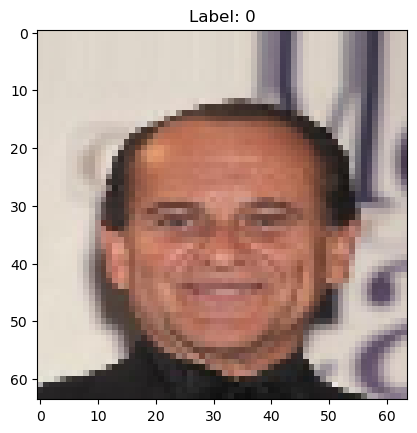

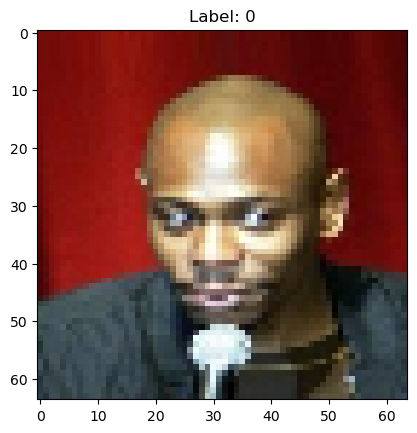

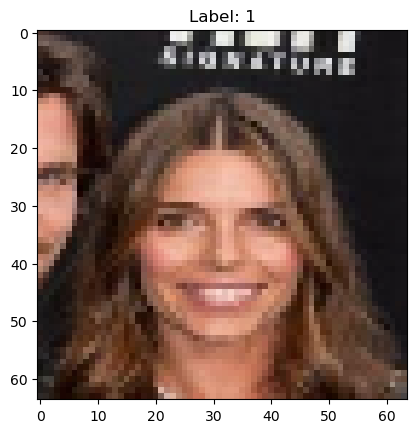

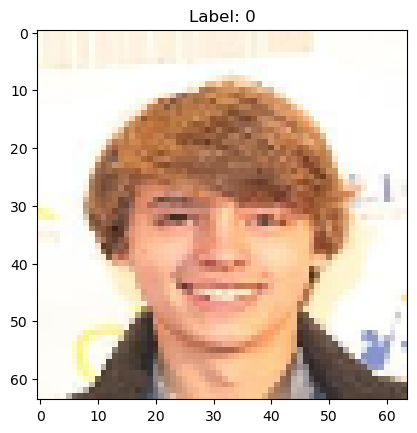

Unique elements and their counts: {0: 2000, 1: 2000}
Male images: 2000 (50.00%)
Female images: 2000 (50.00%)


In [2]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 随机打乱输入数据X和输出数据y的顺序，以消除数据的顺序对模型训练的影响
X, y = shuffle(X, y)

# 显示950-1005张图像及其标签
for i in range(998, 1002):
    plt.imshow(X[i])
    plt.title(f'Label: {y[i]}')
    plt.show()

#检查数据集数目男女是否均衡
unique_elements, counts = np.unique(y, return_counts=True)
print("Unique elements and their counts:", dict(zip(unique_elements, counts)))

male_count = counts[0]
female_count = counts[1]
total_count = male_count + female_count
print(f"Male images: {male_count} ({male_count / total_count * 100:.2f}%)")
print(f"Female images: {female_count} ({female_count / total_count * 100:.2f}%)")



# 3划分数据集
将收集到的数据集划分为训练集、验证集和测试集。划分比例为：训练集占70%，验证集占15%，测试集占15%。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# 假设已经加载并预处理好图片数据，存储在X中，标签存储在y中
# X = ...
# y = ...

# 数据集划分
def split_data(X, y):
    """
    将数据集划分为训练集、验证集和测试集。

    参数:
    X -- 图片数据
    y -- 图片对应的标签

    返回值:
    X_train, X_val, X_test, y_train, y_val, y_test -- 划分后的数据集
    """
    # 将数据集划分为训练集和临时数据集（验证集+测试集），比例为70% : 30%
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

    # 将临时数据集划分为验证集和测试集，比例为50% : 50%，即相对于原数据集各占15%
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 调用split_data函数进行数据集划分
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# 打印划分后的数据集大小
print("训练集大小:", X_train.shape, y_train.shape)
print("验证集大小:", X_val.shape, y_val.shape)
print("测试集大小:", X_test.shape, y_test.shape)

# 计算训练集中男性和女性图像的数量
num_male_train = np.sum(y_train == 0)
num_female_train = np.sum(y_train == 1)

# 计算验证集中男性和女性图像的数量
num_male_val = np.sum(y_val == 0)
num_female_val = np.sum(y_val == 1)

# 计算测试集中男性和女性图像的数量
num_male_test = np.sum(y_test == 0)
num_female_test = np.sum(y_test == 1)

# 打印各数据集中男性和女性图像的数量
print("训练集中男性图像数量:", num_male_train)
print("训练集中女性图像数量:", num_female_train)
print("验证集中男性图像数量:", num_male_val)
print("验证集中女性图像数量:", num_female_val)
print("测试集中男性图像数量:", num_male_test)
print("测试集中女性图像数量:", num_female_test)


训练集大小: (2800, 64, 64, 3) (2800,)
验证集大小: (600, 64, 64, 3) (600,)
测试集大小: (600, 64, 64, 3) (600,)
训练集中男性图像数量: 1429
训练集中女性图像数量: 1371
验证集中男性图像数量: 280
验证集中女性图像数量: 320
测试集中男性图像数量: 291
测试集中女性图像数量: 309


# 4.训练模型
使用TensorFlow和Keras搭建的基于VGG16预训练模型（使用超参数搜索）

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD  # 更改优化器为SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_sample_weight

# 假设已经加载并预处理好图片数据，存储在X中，标签存储在y中
# X = ...
# y = ...

# 使用你提供的split_data函数划分数据集
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# 计算样本权重
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 准备数据增强（data augmentation）
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# 使用.flow()方法生成训练集和验证集
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, sample_weight=sample_weights)
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=32)

# 创建和训练模型（与之前的代码相同）
# 更改输入尺寸为(64, 64, 3)，与您的数据集尺寸匹配
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# 更改输出层为二分类问题
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
# 更改损失函数为binary_crossentropy
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])  # 使用最优参数

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


Epoch 1/30
88/88 [==============================] - 35s 390ms/step - loss: 1.0679 - accuracy: 0.4986 - val_loss: 0.7022 - val_accuracy: 0.4667
Epoch 2/30
88/88 [==============================] - 31s 355ms/step - loss: 0.6943 - accuracy: 0.5018 - val_loss: 0.6923 - val_accuracy: 0.5333
Epoch 3/30
88/88 [==============================] - 31s 356ms/step - loss: 0.6936 - accuracy: 0.4889 - val_loss: 0.6928 - val_accuracy: 0.5333
Epoch 4/30
88/88 [==============================] - 32s 360ms/step - loss: 0.6938 - accuracy: 0.4814 - val_loss: 0.6935 - val_accuracy: 0.4667
Epoch 5/30
88/88 [==============================] - 31s 356ms/step - loss: 0.6935 - accuracy: 0.4989 - val_loss: 0.6928 - val_accuracy: 0.5333
Epoch 6/30
88/88 [==============================] - 32s 363ms/step - loss: 0.6935 - accuracy: 0.4925 - val_loss: 0.6940 - val_accuracy: 0.4667
Epoch 7/30
88/88 [==============================] - 31s 357ms/step - loss: 0.6935 - accuracy: 0.4939 - val_loss: 0.6940 - val_accuracy: 0.4667

# 5.评估模型：
在测试集上评估训练好的模型的性能。常用的评估指标包括准确率、召回率、F1分数等。如果评估结果满意，你可以继续下一步；如果不满意，可以调整模型结构或超参数，然后重新训练和评估。

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# 评估模型在测试集上的性能
loss, accuracy = model.evaluate(X_test, y_test)

print("Test accuracy: {:.2f}%".format(accuracy * 100))

# 计算混淆矩阵和分类报告
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).reshape(-1)

cm = confusion_matrix(y_test, y_pred_classes)
cr = classification_report(y_test, y_pred_classes, target_names=["Male", "Female"], output_dict=True)

print("\n")
print("Summary:")
print("The model correctly classified {:.2f}% of the test images.".format(accuracy * 100))
print("The model correctly classified {:.2f}% of the male images.".format(cr["Male"]["recall"] * 100))
print("The model correctly classified {:.2f}% of the female images.".format(cr["Female"]["recall"] * 100))

print("\nDetailed Results:")
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print("Male:")
print("  - Precision: {:.2f}%".format(cr["Male"]["precision"] * 100))
print("  - Recall: {:.2f}%".format(cr["Male"]["recall"] * 100))
print("  - F1 Score: {:.2f}%".format(cr["Male"]["f1-score"] * 100))
print("Female:")
print("  - Precision: {:.2f}%".format(cr["Female"]["precision"] * 100))
print("  - Recall: {:.2f}%".format(cr["Female"]["recall"] * 100))
print("  - F1 Score: {:.2f}%".format(cr["Female"]["f1-score"] * 100))


#将数据写入文件
import pandas as pd
import os

# 定义将结果写入 CSV 文件的函数
def write_results_to_csv(filename, results):
    if os.path.isfile(filename):
        # 文件已存在，追加新行
        with open(filename, 'a') as f:
            results.to_csv(f, header=False, index=False)
    else:
        # 文件不存在，创建并写入标题行
        results.to_csv(filename, header=True, index=False)

# 从评估结果中创建 Pandas DataFrame
results = pd.DataFrame({
    'model_name': ['VGG16'],  # 添加模型名称
    'pretraining_image_count': [X_train.shape[0]],  # 添加预训练时使用的图像数量
    'training_epochs': [30],  # 添加模型训练轮数
    'data_count': [len(X_test)],
    'model_parameters': [model.count_params()],
    'accuracy': [accuracy],
    'male_precision': [cr['Male']['precision']],
    'male_recall': [cr['Male']['recall']],
    'male_f1_score': [cr['Male']['f1-score']],
    'female_precision': [cr['Female']['precision']],
    'female_recall': [cr['Female']['recall']],
    'female_f1_score': [cr['Female']['f1-score']]
})

# 将评估结果写入 CSV 文件
filename = 'evaluation_results.csv'
write_results_to_csv(filename, results)


19/19 [==============================] - 3s 162ms/step - loss: 0.6933 - accuracy: 0.5083
Test accuracy: 50.83%
19/19 [==============================] - 3s 159ms/step


Summary:
The model correctly classified 50.83% of the test images.
The model correctly classified 3.09% of the male images.
The model correctly classified 95.79% of the female images.

Detailed Results:
Confusion Matrix:
[[  9 282]
 [ 13 296]]

Classification Report:
Male:
  - Precision: 40.91%
  - Recall: 3.09%
  - F1 Score: 5.75%
Female:
  - Precision: 51.21%
  - Recall: 95.79%
  - F1 Score: 66.74%


In [6]:
# 假设您已经训练好一个名为 best_model 的模型

# 保存为 HDF5 文件
model.save('my_model.h5')

# 或者，保存为 TensorFlow SavedModel 格式
model.save('my_saved_model')


NameError: name 'best_model' is not defined